### Foreground Extraction in an Image using Grabcut Algorithm

The idea here is to find the foreground, and remove the background. 

#### GrabCut Algorithm for Image Segmentation

GrabCut is an interactive image segmentation algorithm that was introduced by Carsten Rother, Vladimir Kolmogorov, and Andrew Blake in 2004. It is a graph-cut-based algorithm designed to segment an image into foreground and background regions, making it particularly useful for applications like image editing and object recognition.

The algorithm requires user interaction to initialize the segmentation process. Typically, a rectangle is drawn around the object of interest in the image. The algorithm then iteratively refines this initial segmentation based on color and texture information within and outside the rectangle.

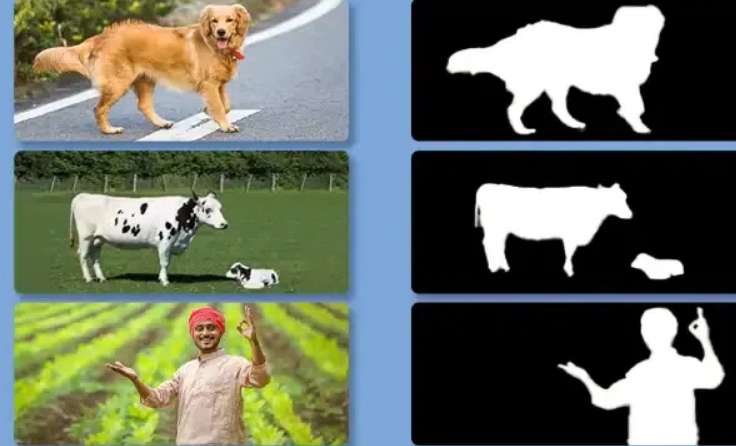

<b>Foreground extract</b> is a part of image segmentation, where the goal is to precisely delineate and separate the main objects or subjects (foreground) from the rest of the image (background).

Image segmentation techniques, including semantic segmentation or instance segmentation, contribute to achieving accurate and detailed delineation of the foreground within an image.

#### How does GrabCut Algorithm work for Image Segmentation?

 - <b>Region Drawing:</b> In this algorithm, the region is drawn in accordance with the foreground, a rectangle is drawn over it. This is the rectangle that encases our main object. The region coordinates are decided over understanding the foreground mask but imperfect segmentation may occur, marked for manual correction.

 - <b>Region of Interest (ROI) Selection:</b> The region of interest is decided by the amount of segmentation of foreground and background is to be performed and is chosen by the user. Everything outside the ROI is considered as background and turned black.

 - <b>Gaussian Mixture Model (GMM):</b> Then Gaussian Mixture Model(GMM) is used for modeling the foreground and the background. Then, in accordance with the data provided by the user, the GMM learns and creates labels for the unknown pixels and each pixel is clustered in terms of color statistics.

 - <b>Graph Generation:</b> A graph is generated from this pixel distribution where the pixels are considered as nodes and two additional nodes are added that is the Source node and Sink node. All the foreground pixels are connected to the Source node and every Background pixel is connected to the Sink node.

The weights of edges connecting pixels to the Source node and to the End node are defined by the probability of a pixel being in the foreground or in the background.

If huge dissimilarity is found in pixel color, the low weight is assigned to that edge:

 - <b>Graph Segmentation Algorithm:</b> Then the algorithm is applied to segment the graph. The algorithm segments the graph into two, separating the source node and the sink node with the help of a cost function which is the sum of all weights of the edges that are segmented.

 - <b>Foreground-Background Labeling:</b> After the segmentation, the pixels that are connected to the Source node is labeled as foreground and those pixels which are connected to the Sink node is labeled as background.

This process is done for multiple iterations as specified by the user. This gives us the extracted foreground.

#### GrabCut in OpenCV

The function used here is cv2.grabCut()

<b>Syntax:</b> cv2.grabCut(image, mask, rectangle, backgroundModel, foregroundModel, iterationCount[, mode])

<b>Parameters:</b>

 - image: Input 8-bit 3-channel image.
 - mask: Input/output 8-bit single-channel mask. The mask is initialized by the function when mode is set to GC_INIT_WITH_RECT. Its elements may have one of following values: 
    - GC_BGD defines an obvious background pixels.
    - GC_FGD defines an obvious foreground (object) pixel.
    - GC_PR_BGD defines a possible background pixel.
    - GC_PR_FGD defines a possible foreground pixel.
 - rectangle: It is the region of interest containing a segmented object. The pixels outside of the ROI are marked as obvious background. The parameter is only used when mode==GC_INIT_WITH_RECT.
 - backgroundModel: Temporary array for the background model.
 - foregroundModel: Temporary array for the foreground model.
 - iterationCount: Number of iterations the algorithm should make before returning the result. Note that the result can be refined with further calls with mode==GC_INIT_WITH_MASK or mode==GC_EVAL.
 - mode: It defines the Operation mode. It can be one of the following: 
    - GC_INIT_WITH_RECT: The function initializes the state and the mask using the provided rectangle. After that it runs iterCount iterations of the algorithm.
    - GC_INIT_WITH_MASK: The function initializes the state using the provided mask. Note that GC_INIT_WITH_RECT and GC_INIT_WITH_MASK can be combined. Then, all the pixels outside of the ROI are automatically initialized with GC_BGD.
    - GC_EVAL: The value means that the algorithm should just resume.

In [1]:
import cv2
import numpy as np

In [2]:
# path to input image specified and image is loaded with imread command
image = cv2.imread('foreground.jpg')
  
# create a simple mask image similar to the loaded image, with the shape and return type
mask = np.zeros(image.shape[:2], np.uint8)
  
# specify the background and foreground model using numpy the array is constructed of 1 row and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
  
# define the Region of Interest (ROI) as the coordinates of the rectangle where the values are entered as (startingPoint_x, startingPoint_y, 
# width, height) these coordinates are according to the input image.It may vary for different images
rectangle = (20, 100, 150, 150)
  
# apply the grabcut algorithm with appropriate values as parameters, number of iterations = 3 
# cv2.GC_INIT_WITH_RECT is used because of the rectangle mode is used 
cv2.grabCut(image, mask, rectangle, backgroundModel, foregroundModel, 3, cv2.GC_INIT_WITH_RECT)
  
# In the new mask image, pixels will be marked with four flags. four flags denote the background / foreground. mask is changed, 
# all the 0 and 2 pixels are converted to the background mask is changed, all the 1 and 3 pixels are now the part of the foreground
# the return type is also mentioned, this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
  
# The final mask is multiplied with the input image to give the segmented image.
image_segmented = image * mask2[:, :, np.newaxis]

cv2.imshow("image", image)
cv2.imshow("image_segmented", image_segmented)

cv2.waitKey()
cv2.destroyAllWindows()

The GrabCut algorithm has successfully segmented the foreground characters, Goku and Vegeta, from the background. Here are some specific observations:

 - <b>Accurate segmentation of characters:</b> The GrabCut algorithm has effectively separated Goku and Vegeta from the background with minimal errors. The edges of the characters are mostly smooth and well-defined.
 - <b>Partial segmentation of some objects:</b> The segmentation is less accurate for objects with complex textures or transparencies, such as Goku’s hair and Vegeta’s aura. These areas appear partially segmented or blended with the background.
 - <b>Potential for further refinement:</b> While the segmentation is good overall, some minor adjustments could improve accuracy, particularly around complex areas like hair and auras.

#### Why Grabcut is useful but lacks Perfection?

GrabCut is a valuable image segmentation tool, offering efficient foreground extraction by involving user-provided information. It relies on a user-defined bounding box to distinguish between foreground and background.

However, its reliance on manual input makes it susceptible to inaccuracies, especially in cases where the object boundaries are not well-defined or when there are complex structures.

GrabCut may struggle with subtle and intricate details, leading to imperfect segmentations. While it serves as a practical solution for many applications, its dependency on user guidance and potential challenges in handling complex scenarios contribute to its limitation and lack of perfection in certain cases.